In [1]:
!pip install lmfit

In [2]:
!pip install umap-learn

In [3]:
!pip install tpot

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lmfit import Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap
from tpot import TPOTClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()
pl.rc('font',family='Arial')

In [7]:
data = pd.read_csv("dataOG.csv")
labels = pd.read_csv("labels.csv")
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [8]:
data.shape

(801, 20532)

In [9]:
import os
os.listdir()

['.ipynb_checkpoints',
 'cancerClust.ipynb',
 'dataOG.csv',
 'downloadedData',
 'labels.csv']

In [10]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [11]:
X = data.drop(data.columns[0],axis=1)
Y = labels.Class

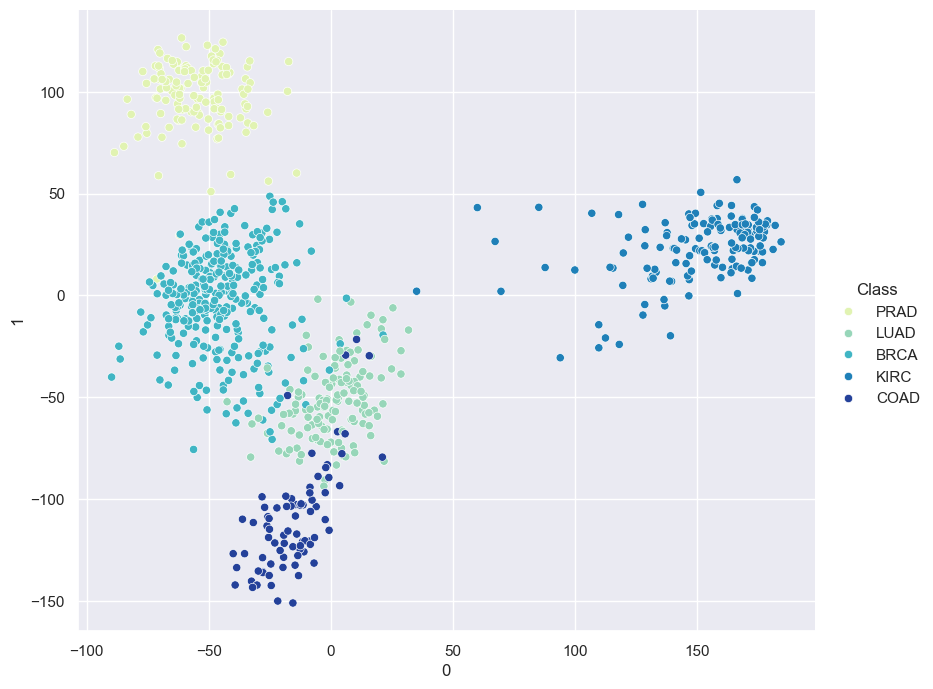

In [12]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_pca, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

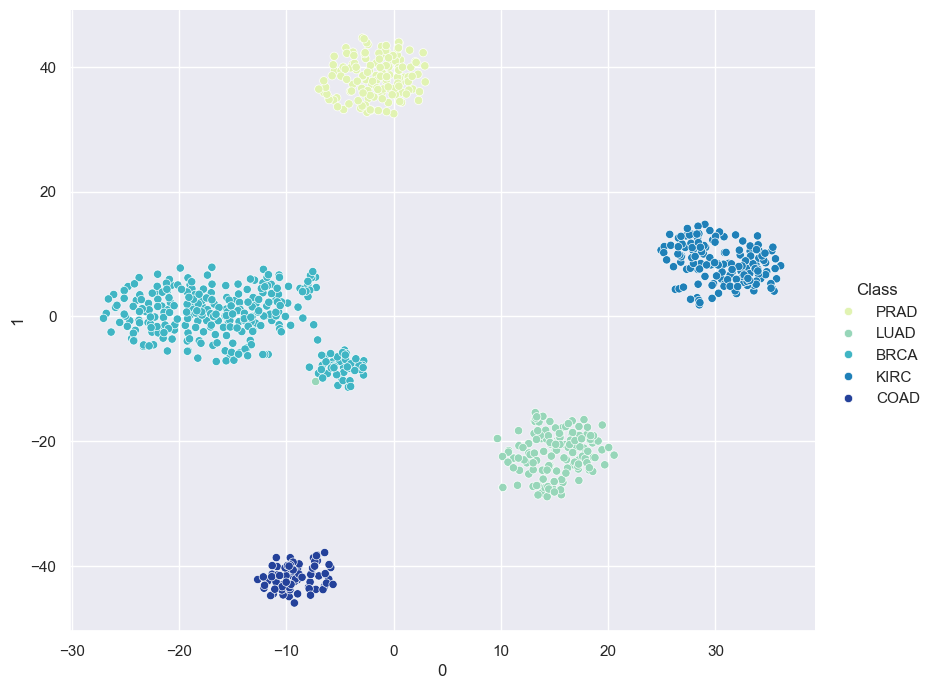

In [13]:
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

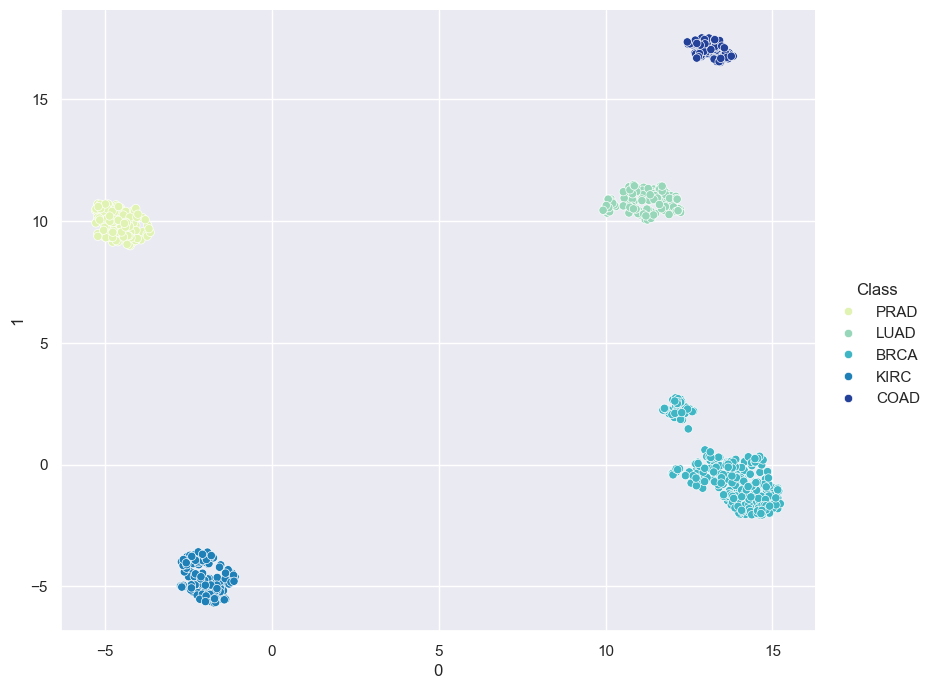

In [14]:
X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [15]:
X = X_umap.drop(['Class'],axis=1)
Y = X_umap['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

In [16]:
lsvc_model = SVC(kernel = 'linear', random_state = 10)
lsvc_model.fit(X_train, Y_train) 
Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

train score: 0.9983333333333333
test score:  1.0
